# Projeto Final - Conjunto de dados históricos do Bitcoin;

### Introdução

###### O Bitcoin é uma moeda digital peer-to-peer única, caracterizada pela sua independência de uma autoridade central. Ele representa o primeiro sistema de pagamentos global totalmente descentralizado. Enquanto as transações online tradicionais dependem de intermediários de confiança, o Bitcoin elimina essa necessidade, evitando gastos duplicados através da sua tecnologia inovadora. Essa abordagem descentralizada, sem a necessidade de terceiros, confere ao Bitcoin uma autonomia inédita no panorama financeiro, transformando as normas tradicionais de transações e pagamentos. O objetivo deste trabalho é analisar o crescimento de um ativo ao longo dos últimos anos, utilizando dados provenientes de diversas fontes, incluindo a base de dados do Yahoo Finance, os gráficos do Coin360.com incorporados por meio de Iframes e informações disponíveis no arquivo CSV do Kaggle.com. A análise busca identificar potenciais oportunidades de investimento ao longo desse período. Através desta abordagem abrangente e multidimensional, este trabalho pretende fornecer uma visão holística do crescimento do ativo nos últimos anos, com o objetivo de orientar potenciais investidores na identificação de oportunidades e na tomada de decisões informadas.

#### Dados 1

### 1.Coletando dados do mercado financeiro Yahoo Finance;

In [9]:
import yfinance as yf
from pandas import json_normalize
import pandas as pd
import requests
from datetime import datetime

#### 1.1 Criando um Ticker BTC;

In [4]:
ticker = yf.Ticker('BTC-USD')

### Resultados

#### 1.2 Cotação com periodo de 1 ano com intervalo de 1 dia em porcentagem;

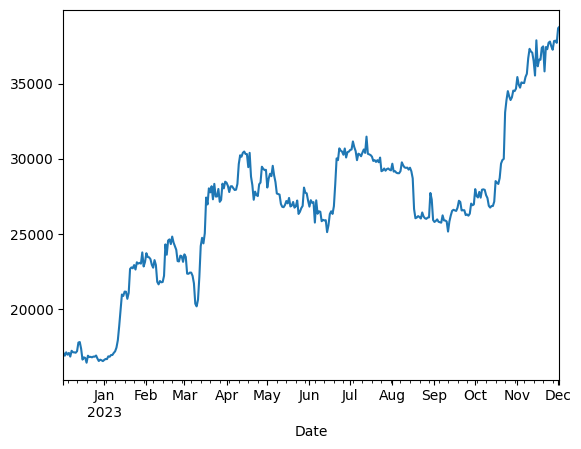

In [39]:
ticker.history(period='1y', interval='1d')['Close'].plot()

b5 = ticker.history(period='1y', interval='1d')['Close']

In [44]:
# Calcule a porcentagem de crescimento
valor_inicial = b5.iloc[0]
valor_final = b5.iloc[-1]
porcentagem_crescimento = ((valor_final - valor_inicial) / abs(valor_inicial)) * 100

# Imprima a porcentagem de crescimento
print(f"A porcentagem de crescimento do BTC é: {porcentagem_crescimento:.2f}%")




A porcentagem de crescimento do BTC é: 126.96%


#### 1.3 Criando Dataframe com amostra mensal;

In [51]:

data = yf.download('BTC-USD', start=datetime(2023, 10, 1), end=datetime(2023, 12, 1))

b3 = pd.DataFrame(data)

b3.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-01,26967.396484,28047.238281,26965.093750,27983.750000,27983.750000,9503917434
2023-10-02,27976.798828,28494.458984,27347.787109,27530.785156,27530.785156,19793041322
2023-10-03,27508.251953,27667.191406,27216.001953,27429.978516,27429.978516,11407814187
2023-10-04,27429.074219,27826.658203,27248.105469,27799.394531,27799.394531,11143355314
2023-10-05,27798.646484,28091.861328,27375.601562,27415.912109,27415.912109,11877253670


#### 1.4 Plotando o preço de abertura,alta e baixa;

<Axes: xlabel='Date'>

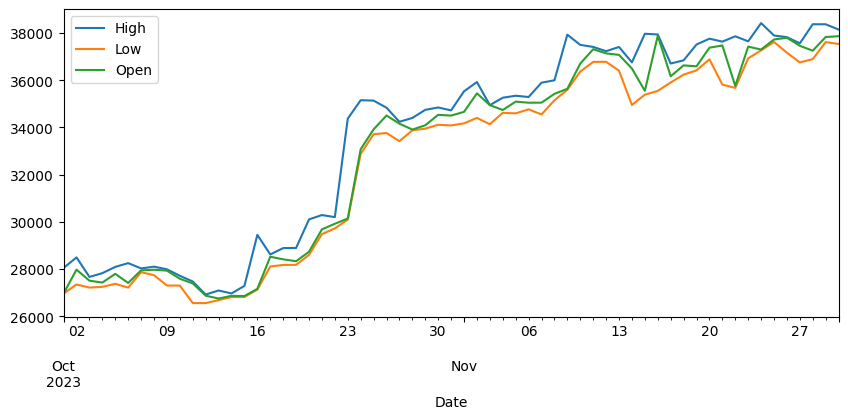

In [52]:
b3.plot(y=['High', 'Low', 'Open'], figsize=(10, 4))

#### 1.5 Calcular porcentagem;

In [53]:
# Calcular a porcentagem de valorização
valor_inicial = b3['Open'].iloc[0]  # Use 'Open' ou outra coluna apropriada

valor_final = b3['Close'].iloc[-1]  # Use 'Close' ou outra coluna apropriada

porcentagem_valorizacao = ((valor_final - valor_inicial) / valor_inicial) * 100

print(f"A porcentagem de valorização do BTC é: {porcentagem_valorizacao:.2f}%")


A porcentagem de valorização do BTC é: 39.85%


#### 1.5 Calcular o preço máximo da alta;

In [97]:
# Calcula o preço máximo na coluna 'high' 
max_value = float(b3['High'].max())

# Usando a função format para formatar o preço
formatted_price = '${:,.2f}'.format(max_value)

# Imprimindo o resultado
print(f'Máxima do BTC está entre {start} e {end}. Preço: {formatted_price}')


Máxima do BTC está entre 2023-10-01 e 2023-11-01. Preço: $35,150.43


### Conclusão 1

###### A base de dados do Yahoo Finance forneceu informações abrangentes sobre o desempenho, permitindo uma análise histórica detalhada do ativo. Sendo assim, verificamos que a porcentagem de crescimento do BTC ao longo do ano de 2023 foi de 126,96%. Também realizamos uma amostragem dos últimos meses, na qual identificamos o preço máximo histórico de $35.150,43, com uma porcentagem de valorização do BTC de 39,85%. 

### Dados 2

### 2. Importando iframe HTML da web coin360.com

##### Preço, Variação e dominância de mercado;

In [99]:
from IPython.display import HTML

src = "https://coin360.com/widget/top-10?utm_source=embed_map"

HTML(f'<iframe src="{src}" width="400" height="300" frameborder="0" title="Coin360.com: Top 10 Coins"></iframe>')


### Conclusão 2

###### O widget da Coin360 apresenta uma visualização gráfica abrangente do desempenho das criptomoedas, concentrando-se em dados cruciais relacionados às principais moedas digitais. Fornece informações sobre o preço atual do Bitcoin e a variação percentual nas últimas 24 horas, mas também destaca a dominância de mercado, pois representa a parcela de participação do Bitcoin em relação ao mercado global de criptomoedas. Com isso, o widget trás uma perspectiva abrangente, abordando aspectos como valores atuais, mudanças recentes e a posição relativa do Bitcoin no cenário do mercado de criptomoedas.

### Dados 3

### 3. Conjunto de dados históricos do Bitcoin "https://www.kaggle.com/"


In [121]:
# Carregar o conjunto de dados arquivo CSV

btc_2021 = pd.read_csv('BTC-2021min.csv')

# Exibir as primeiras linhas do DataFrame

print(btc_2021.columns)

btc_2021.info()

btc_2021.head()

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


#### 3.1 Chamar linha pelo índice;

In [122]:
# Chamar linhas pelo seu índice; Linha Zero!

btc_2021.loc[0]

unix                   1646106180
date          2022-03-01 03:43:00
symbol                    BTC/USD
open                     43046.58
high                     43046.58
low                      43046.58
close                    43046.58
Volume BTC                    0.0
Volume USD                    0.0
Name: 0, dtype: object

#### 3.2 Definimos a coluna "date" como index;

In [123]:
# primeiro devemos definir uma coluna como index por meio de set_index

btc_index =  btc_2021.set_index("date")

btc_index.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2022-03-01 03:43:00,1646106180,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
2022-03-01 03:41:00,1646106060,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2022-03-01 03:40:00,1646106000,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
2022-03-01 03:39:00,1646105940,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
2022-03-01 03:38:00,1646105880,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


#### 3.3 Remover linhas duplicadas;

In [124]:
btc_2021.dropna(inplace=True)

btc_2021.dropna()

print(btc_2021[btc_2021.duplicated()])

btc_2021.head()

Empty DataFrame
Columns: [unix, date, symbol, open, high, low, close, Volume BTC, Volume USD]
Index: []


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


#### 3.4 Remover colunas desnecessária;

In [125]:
# Usar drop para remover a coluna 
btc_2021 = btc_2021.drop('unix',  axis=1)


In [126]:
# Deletar a linha zero, que apresenta volume nulo;

btc_2021.drop(0, inplace=True)

btc_2021.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
5,2022-03-01 03:37:00,BTC/USD,43078.73,43092.09,43078.73,43088.92,1.593095,68644.735251


#### 3.5 Detectamos a preço máximo do ano 2021;

In [158]:
# Calcula o preço máximo na coluna 'high' 
max_value = float(btc_2021['high'].max())

# Usando a função format para formatar o preço
formatted_price = '${:,.2f}'.format(max_value)

# Imprimindo o resultado
print(f'Máxima do BTC está entre {start_date} e {end_date}. Preço: {formatted_price}')


Máxima do BTC está entre 2021-05-01 e 2021-06-31. Preço: $69,000.00


#### 3.6 Filtramos meses maio e junho 2021;

In [138]:

# Filtrar o DataFrame para o intervalo desejado

start_date, end_date = '2021-05-01', '2021-06-31'

filtered_mes = btc_2021[(btc_2021['date'] >= start_date) & (btc_2021['date'] <= end_date)]

display(filtered_mes)

,date,symbol,open,high,low,close,Volume BTC,Volume USD
350143,2021-06-30 23:59:00,BTC/USD,35049.36,35049.36,35037.23,35037.23,0.018600,651.692478
350144,2021-06-30 23:58:00,BTC/USD,35048.38,35072.76,35043.90,35065.60,1.076847,37760.301943
350145,2021-06-30 23:57:00,BTC/USD,35040.21,35061.10,35033.44,35035.56,0.762263,26706.304065
350146,2021-06-30 23:56:00,BTC/USD,35023.65,35049.01,35010.57,35034.58,2.525764,88489.064803
350147,2021-06-30 23:55:00,BTC/USD,35073.72,35073.72,35023.65,35034.44,11.014532,385887.965387
...,...,...,...,...,...,...,...,...
437978,2021-05-01 00:04:00,BTC/USD,57769.10,57871.27,57769.10,57864.17,10.773452,623396.882896
437979,2021-05-01 00:03:00,BTC/USD,57784.81,57817.20,57775.82,57793.39,0.584567,33784.098209
437980,2021-05-01 00:02:00,BTC/USD,57679.09,57784.81,57679.09,57784.81,13.922803,804526.519088
437981,2021-05-01 00:01:00,BTC/USD,57632.69,57633.91,57555.00,57633.91,5.714579,329353.538690


### Resultados

#### 3.7 Plotar o preço máximo;

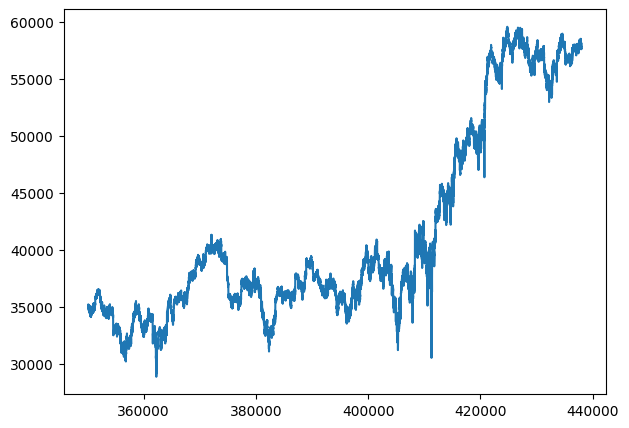

In [139]:
from datetime import datetime
import matplotlib.pyplot as plt

plt.subplots(1,1, figsize=(7,5))

plt.plot(filtered_mes['close'])

#### 3.8 Verificamos o percentual de valorização;

In [140]:
# Calcular a porcentagem de valorização
valor_inicial = filtered_mes['open'].iloc[0]  

valor_final = filtered_mes['close'].iloc[-1]  

porcentagem_valorizacao = ((valor_final - valor_inicial) / valor_inicial) * 100

print(f"A porcentagem de valorização do BTC é: {porcentagem_valorizacao:.2f}%")

A porcentagem de valorização do BTC é: 64.44%


#### 3.9 Plotar volume;

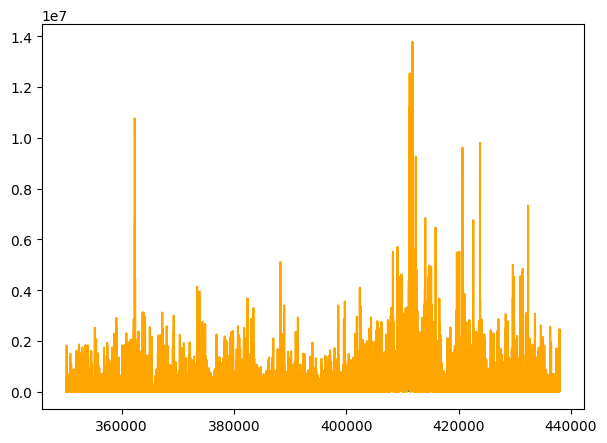

In [155]:

plt.subplots(1,1, figsize=(7,5))

plt.plot(filtered_mes['Volume USD'], color='orange')

In [162]:
# Calcula o preço máximo na coluna 'high' 
max_value = float(filtered_mes['Volume USD'].max())

# Usando a função format para formatar o preço
formatted_price = '${:,.2f}'.format(max_value)

# Imprimindo o resultado
print(f'Volatilidade máxima foi período {start_date} e {end_date}. Volume: {formatted_price}')

Volatilidade máxima foi período 2021-05-01 e 2021-06-31. Volume: $13,783,062.54


#### 3.7 Plotar preço de abertura, alta e baixa;

<Axes: >

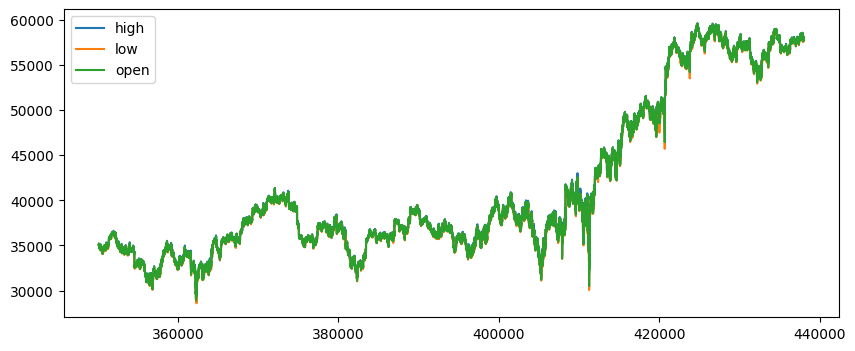

In [156]:
filtered_mes.plot(y=['high', 'low', 'open'], figsize=(10, 4))

### Conclusão 3

###### A coleta de dados realizada no Kaggle.com forneceu informações contidas no arquivo BTC-2017min.csv. Esse conjunto de dados abrange todos os dados históricos de 1 minuto para o ano de 2021. As colunas incluem informações como Unix, datas, Símbolo, abertura, alta, baixa, fechamento, Volume (Crypto) e Volume Base Ccy. Após a coleta, procedemos com a organização dos dados, definindo a coluna de "date" como índice. Adicionalmente, realizamos a limpeza do conjunto de dados, removendo linhas nulas, duplicadas e informações desnecessárias. Em seguida, fizemos uma seleção de dados, focalizando no período de “maio e junho” de 2021, durante o qual observamos uma valorização percentual significativa de 64.44%. Durante esse período, o preço máximo atingiu $69,000.00, e o volume de transações totalizou $13,783,062.54. Ao analisarmos as relações entre os preços de abertura, alta, baixa e fechamento, observamos uma tendência de variação positiva ao longo do tempo. Essa observação sugere uma tendência de alta no preço do ativo, indicando um possível momento favorável para investidores interessados em movimentos ascendentes no mercado. 


### Conclusão Final

###### Em resumo, a combinação dessas análises aponta para um desempenho robusto do Bitcoin, respaldando a atratividade do ativo tanto em termos de crescimento de valor quanto de posição no mercado de criptomoedas. Essas conclusões podem ser valiosas para investidores que buscam tomar decisões informadas em relação ao BTC.

###### JANES BARROS LINO

